In [74]:
import pandas as pd

ex_data = pd.read_csv("/content/expenses.csv")

In [75]:
ex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [76]:
ex_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [77]:

nulls = ex_data.isnull().sum()
print(nulls)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


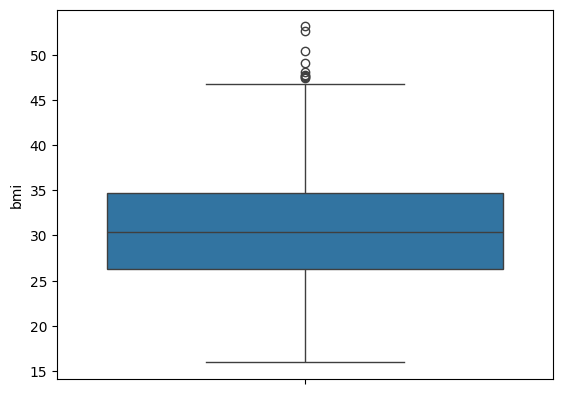

In [78]:
# Outliers
import seaborn as sns
bmi_outliers = sns.boxplot(ex_data['bmi'])

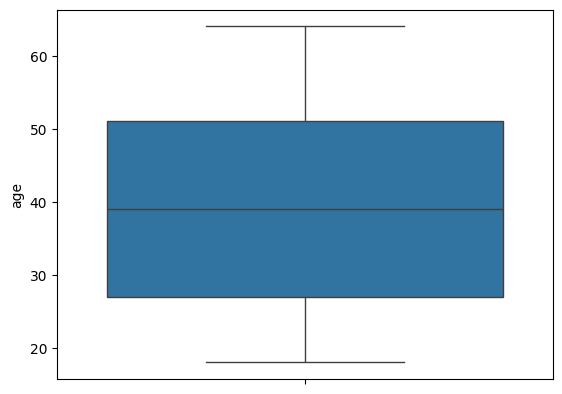

In [79]:
age_outliers = sns.boxplot(ex_data['age'])

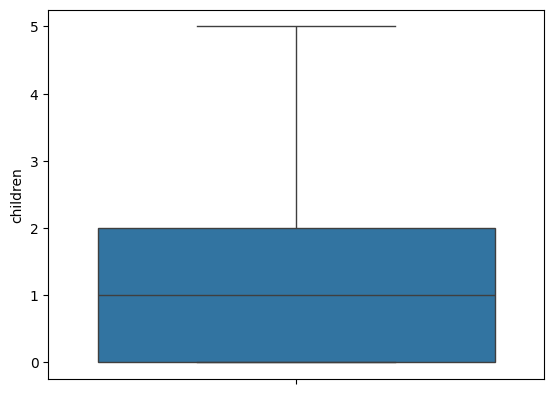

In [80]:
children_outliers = sns.boxplot(ex_data['children'])

age         79
sex         79
bmi         79
children    79
smoker      79
region      79
charges     79
dtype: int64


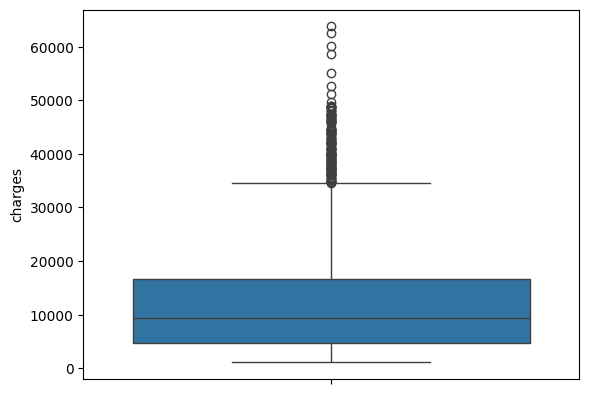

In [81]:
charges_outliers = sns.boxplot(ex_data['charges'])
print(ex_data[ex_data['charges']>40000].count())

In [82]:
#Removing Outliers
def remove_outliers(A, threshold):
  return ex_data[A<threshold]

ex_data = remove_outliers(ex_data['charges'],40000)
ex_data = remove_outliers(ex_data['bmi'],45)
ex_data.count()

age         1244
sex         1244
bmi         1244
children    1244
smoker      1244
region      1244
charges     1244
dtype: int64

In [83]:
ex_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1244 non-null   int64  
 1   sex       1244 non-null   object 
 2   bmi       1244 non-null   float64
 3   children  1244 non-null   int64  
 4   smoker    1244 non-null   object 
 5   region    1244 non-null   object 
 6   charges   1244 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 77.8+ KB


In [84]:

# Encoding the categorical features
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()
ex_data['sex'] = lbl_enc.fit_transform(ex_data['sex'])
ex_data['smoker'] = lbl_enc.fit_transform(ex_data['smoker'])
ex_data['region'] = lbl_enc.fit_transform(ex_data['region'])

ex_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [85]:
#Data cleaning and Feature selection
duplicates = ex_data.duplicated(keep=False)
ex_data['dup_bool'] = duplicates
ex_data[ex_data['dup_bool'] == True].count()

age         2
sex         2
bmi         2
children    2
smoker      2
region      2
charges     2
dup_bool    2
dtype: int64

In [86]:
ex_data = ex_data[ex_data['dup_bool'] == False]
ex_data = ex_data.drop('dup_bool',axis=1)

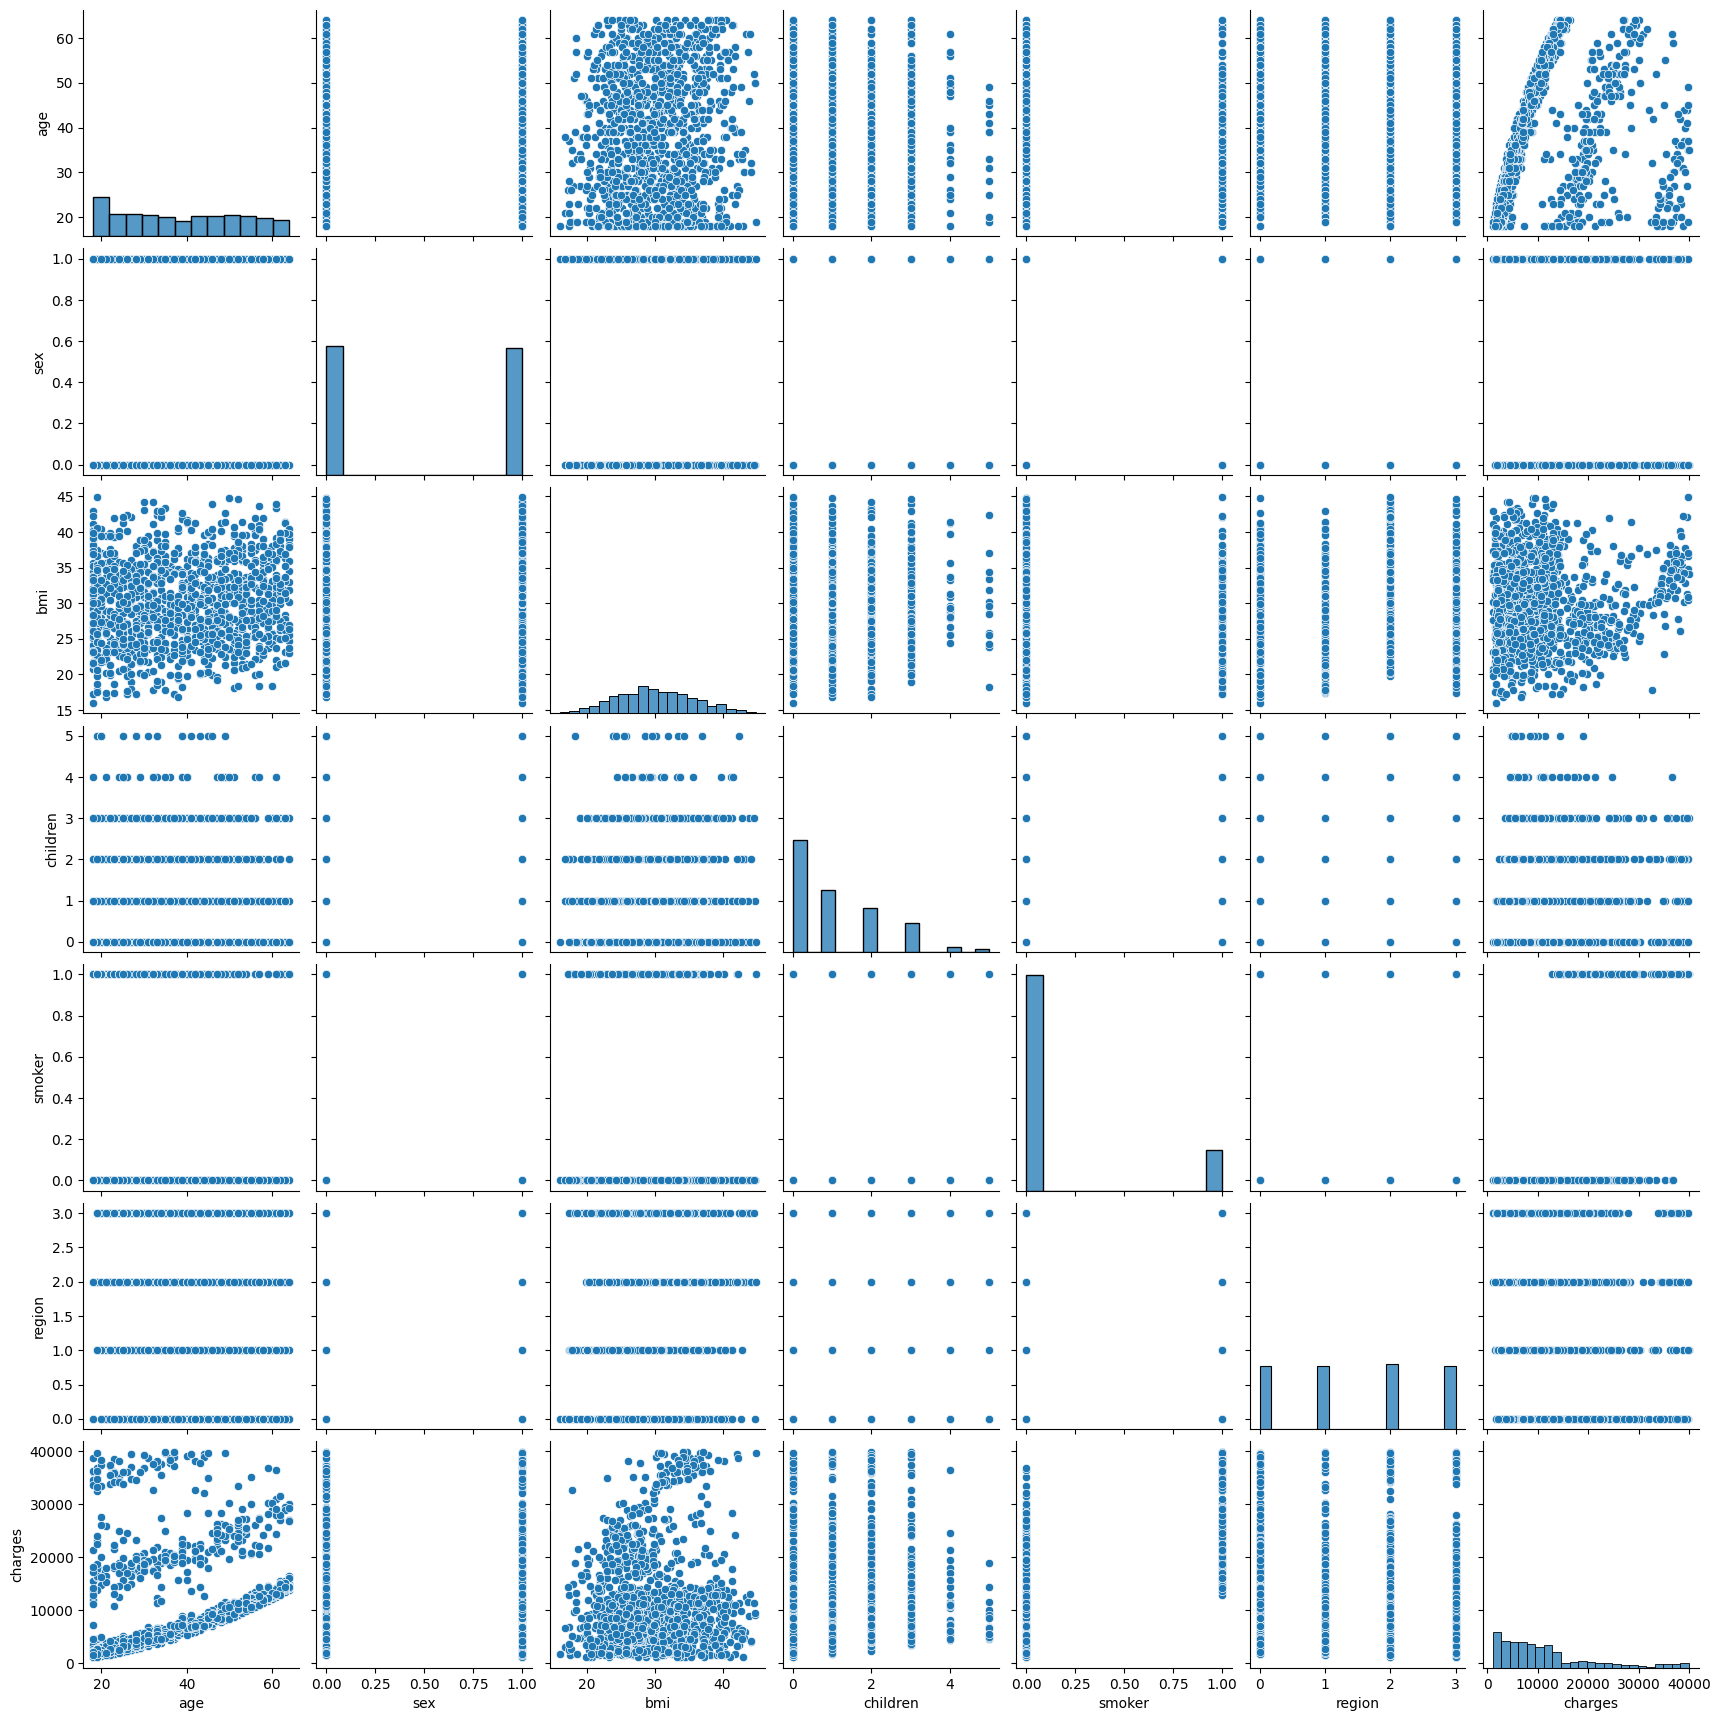

In [87]:
sns.pairplot(ex_data)

In [88]:
# By the Above plots, It can be seen that Age, number of children and region has strong impact on the Insurance costs

In [89]:
from sklearn.model_selection import train_test_split

X = ex_data.drop('charges',axis=1)
y = ex_data['charges']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=30)


In [93]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

trained_model = regressor.fit(X_train,y_train)

y_pred = trained_model.predict(X_test)


In [94]:
#Evaluation
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print('MSE: ',mse)
print('RMSE: ',rmse)
print('R-Squared: ',r2)

MSE:  33211978.93521863
RMSE:  5762.983509886058
R-Squared:  0.5556746848040934
